In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [113]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data = df2.set_index('Date')
data

,Price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


In [114]:
df = data

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7+ KB


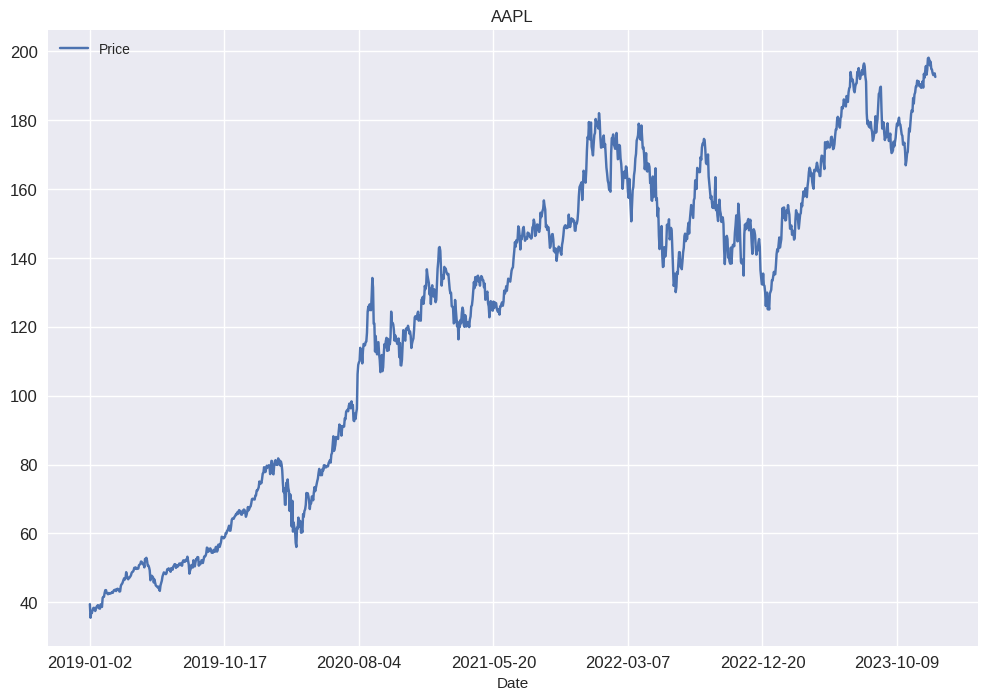

In [116]:
data.plot(figsize = (12, 8), title = "AAPL", fontsize = 12)
plt.show()

In [117]:
sma_s = 50
sma_l = 200

In [118]:
data["SMA_S"] = data.Price.rolling(sma_s).mean()
data["SMA_L"] = data.Price.rolling(sma_l).mean()

In [119]:
data

,Price,SMA_S,SMA_L
Date,,,
2019-01-02,39.48,NaN,NaN
2019-01-03,35.55,NaN,NaN
2019-01-04,37.07,NaN,NaN
2019-01-07,36.98,NaN,NaN
2019-01-08,37.69,NaN,NaN
...,...,...,...
2023-12-22,193.60,185.3988,178.64910
2023-12-26,193.05,185.6828,178.87185
2023-12-27,193.15,185.9714,179.08525


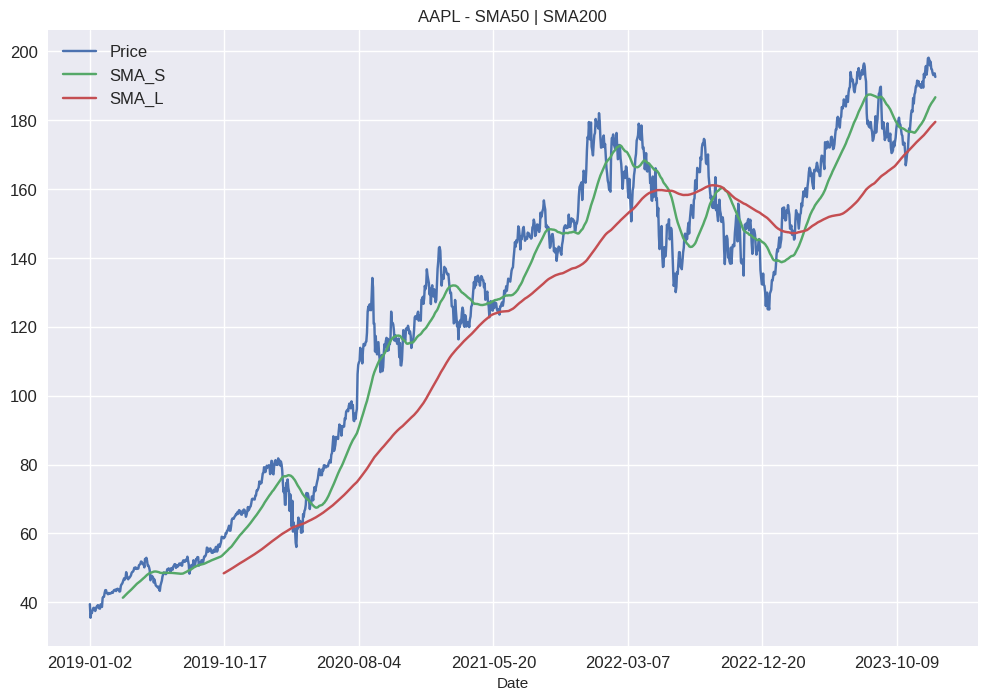

In [120]:
data.plot(figsize = (12, 8), title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [121]:
data.dropna(inplace = True)

In [122]:
data

,Price,SMA_S,SMA_L
Date,,,
2019-10-16,58.59,54.0406,48.44305
2019-10-17,58.82,54.2218,48.53975
2019-10-18,59.10,54.3866,48.65750
2019-10-21,60.13,54.5842,48.77280
2019-10-22,59.99,54.7816,48.88785
...,...,...,...
2023-12-22,193.60,185.3988,178.64910
2023-12-26,193.05,185.6828,178.87185
2023-12-27,193.15,185.9714,179.08525


In [123]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [124]:
data

,Price,SMA_S,SMA_L,position
Date,,,,
2019-10-16,58.59,54.0406,48.44305,1
2019-10-17,58.82,54.2218,48.53975,1
2019-10-18,59.10,54.3866,48.65750,1
2019-10-21,60.13,54.5842,48.77280,1
2019-10-22,59.99,54.7816,48.88785,1
...,...,...,...,...
2023-12-22,193.60,185.3988,178.64910,1
2023-12-26,193.05,185.6828,178.87185,1
2023-12-27,193.15,185.9714,179.08525,1


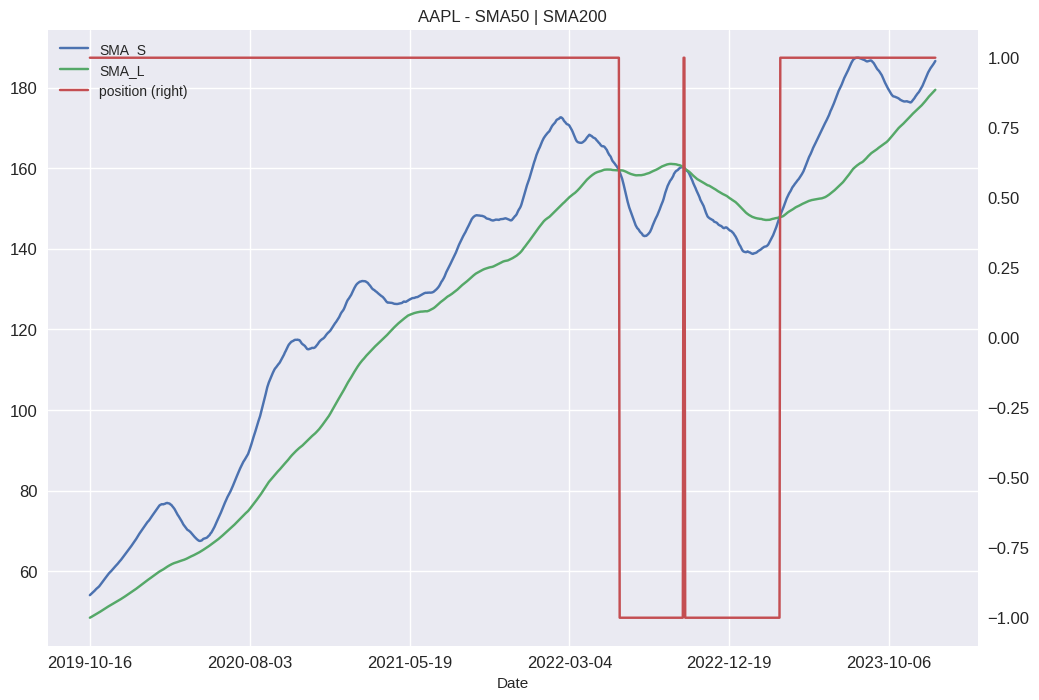

In [125]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [126]:
data["returns"] = data.Price.pct_change()
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
data["strategy"] = data.position.shift(1) * data["returns"]

In [127]:
data

,Price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2019-10-16,58.59,54.0406,48.44305,1,NaN,NaN
2019-10-17,58.82,54.2218,48.53975,1,0.003918,0.003918
2019-10-18,59.10,54.3866,48.65750,1,0.004749,0.004749
2019-10-21,60.13,54.5842,48.77280,1,0.017278,0.017278
2019-10-22,59.99,54.7816,48.88785,1,-0.002331,-0.002331
...,...,...,...,...,...,...
2023-12-22,193.60,185.3988,178.64910,1,-0.005563,-0.005563
2023-12-26,193.05,185.6828,178.87185,1,-0.002845,-0.002845
2023-12-27,193.15,185.9714,179.08525,1,0.000518,0.000518


In [128]:
data.dropna(inplace = True)

In [129]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [130]:
data

,Price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2019-10-17,58.82,54.2218,48.53975,1,0.003918,0.003918,1.003926,1.003926
2019-10-18,59.10,54.3866,48.65750,1,0.004749,0.004749,1.008705,1.008705
2019-10-21,60.13,54.5842,48.77280,1,0.017278,0.017278,1.026284,1.026284
2019-10-22,59.99,54.7816,48.88785,1,-0.002331,-0.002331,1.023895,1.023895
2019-10-23,60.80,54.9528,49.00340,1,0.013412,0.013412,1.037720,1.037720
...,...,...,...,...,...,...,...,...
2023-12-22,193.60,185.3988,178.64910,1,-0.005563,-0.005563,3.304318,2.352014
2023-12-26,193.05,185.6828,178.87185,1,-0.002845,-0.002845,3.294931,2.345333
2023-12-27,193.15,185.9714,179.08525,1,0.000518,0.000518,3.296638,2.346547


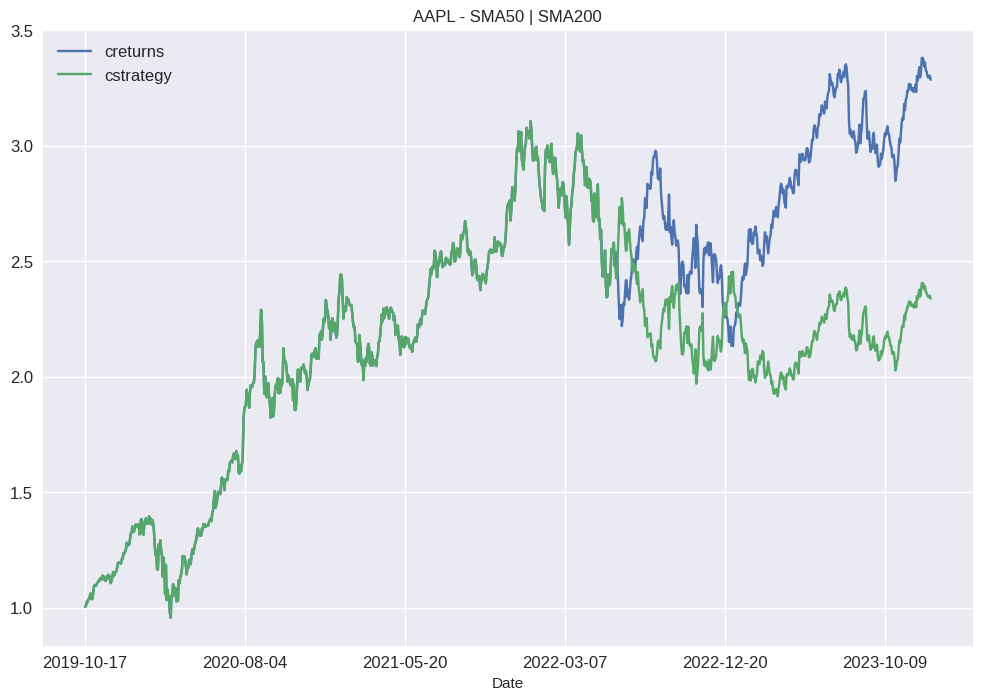

In [131]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [132]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
    data["SMA_S"] = data.Price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [133]:
-run_strategy((50, 200))

<ipython-input-132-ca76749f0c66>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.2579667421884901

## Optimize the parameters

In [134]:
from scipy.optimize import brute

In [135]:
brute(run_strategy, ((10, 50, 1), (100, 250, 1)))

Streaming output truncated to the last 5000 lines.
<ipython-input-132-ca76749f0c66>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-132-ca76749f0c66>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-132-ca76749f0c66>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data

array([ 48., 116.])

In [136]:
-run_strategy((48, 116))

<ipython-input-132-ca76749f0c66>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


2.0861833599639

----------------

## Return (01/01/2024 - 30/09/2024)

In [137]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')
data1

,Price
Date,
2024-01-02,185.64
2024-01-03,184.25
2024-01-04,181.91
2024-01-05,181.18
2024-01-08,185.56
...,...
2024-09-24,227.37
2024-09-25,226.37
2024-09-26,227.52


In [138]:
sma_s_o = 48 # EMA Short
sma_l_o = 116 # EMA Long

In [139]:
data1["SMA_S_o"] = data1.Price.rolling(sma_s_o).mean()
data1["SMA_L_o"] = data1.Price.rolling(sma_l_o).mean()

In [140]:
data1.dropna(inplace = True)

In [141]:
data1["position_o"] = np.where(data1["SMA_S_o"] > data1["SMA_L_o"], 1, -1 )

In [142]:
data1

,Price,SMA_S_o,SMA_L_o,position_o
Date,,,,
2024-06-17,216.67,184.935625,182.358621,1
2024-06-18,214.29,185.904583,182.605603,1
2024-06-20,209.68,186.626250,182.824828,1
2024-06-21,207.49,187.270833,183.045345,1
2024-06-24,208.14,188.009375,183.277759,1
...,...,...,...,...
2024-09-24,227.37,221.814375,206.390000,1
2024-09-25,226.37,221.860000,206.895086,1
2024-09-26,227.52,221.926875,207.347500,1


In [143]:
data1["returns_o"] = data1.Price.pct_change()
data1["returns_o"] = np.log(data1.Price.div(data1.Price.shift(1)))
data1["strategy_o"] = data1.position_o.shift(1) * data1["returns_o"]

In [144]:
data1.dropna(inplace = True)

In [145]:
data1["creturns_o"] = data1["returns_o"].cumsum().apply(np.exp)
data1["cstrategy_o"] = data1["strategy_o"].cumsum().apply(np.exp)

In [146]:
data1

,Price,SMA_S_o,SMA_L_o,position_o,returns_o,strategy_o,creturns_o,cstrategy_o
Date,,,,,,,,
2024-06-18,214.29,185.904583,182.605603,1,-0.011045,-0.011045,0.989016,0.989016
2024-06-20,209.68,186.626250,182.824828,1,-0.021748,-0.021748,0.967739,0.967739
2024-06-21,207.49,187.270833,183.045345,1,-0.010499,-0.010499,0.957631,0.957631
2024-06-24,208.14,188.009375,183.277759,1,0.003128,0.003128,0.960631,0.960631
2024-06-25,209.07,188.836250,183.480431,1,0.004458,0.004458,0.964924,0.964924
...,...,...,...,...,...,...,...,...
2024-09-24,227.37,221.814375,206.390000,1,0.003966,0.003966,1.049384,1.049384
2024-09-25,226.37,221.860000,206.895086,1,-0.004408,-0.004408,1.044769,1.044769
2024-09-26,227.52,221.926875,207.347500,1,0.005067,0.005067,1.050076,1.050076


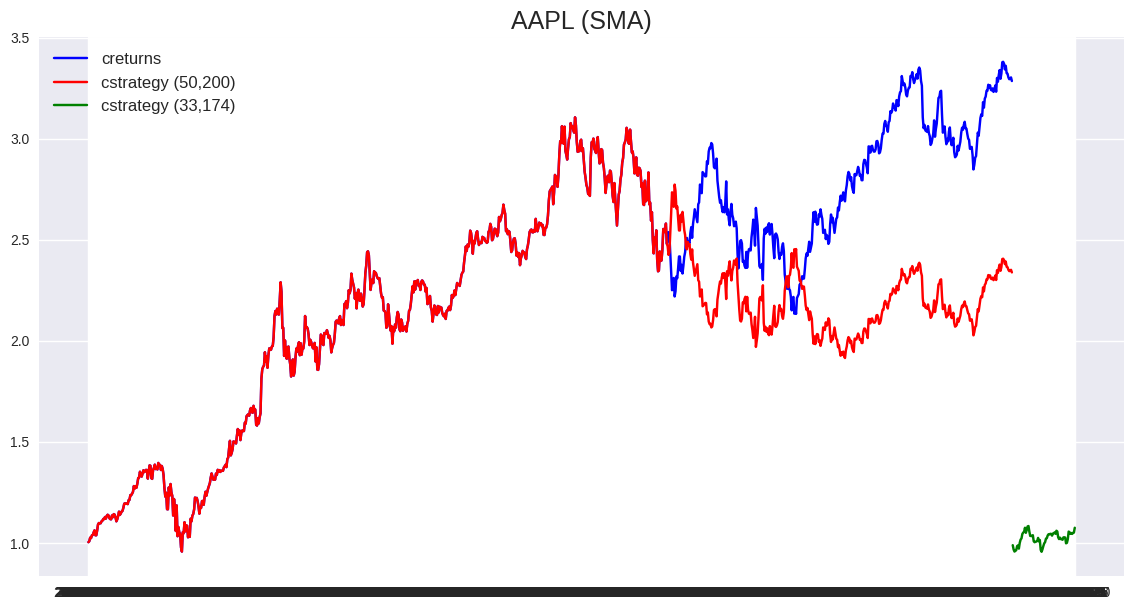

In [147]:
plt.figure(figsize=(14, 7))
plt.plot(data["creturns"], label="creturns", linestyle='-', color='b')
plt.plot(data["cstrategy"], label="cstrategy (50,200)", linestyle='-', color='r')

plt.plot(data1["cstrategy_o"], label="cstrategy (33,174)", linestyle='-', color='g')
plt.title("AAPL (SMA)", fontsize=18)
plt.legend(loc="best", fontsize=12)

plt.show()